# Algorithm comparison with wine quality dataset
For this project, I will utilize a wine quality dataset to model the quality of wine and as well as evaluate the performance of five distinct machine learning algorithms in this classification task. 

You can access the dataset at the following URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset 

This dataset pertains to the red variations of the Portuguese wine "Vinho Verde" and provides information on the quantity of different chemical components within the wine, as well as their impact on its overall quality.

#### It contains the following columns: 
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):<br>
12. quality (score between 0 and 10)

## Approach
The following steps were taken in the execution of this project to ensure a comprehensive and thorough analysis of the wine quality dataset:

- <a href ='#dc' style = 'text-decoration: none'> Data Collection </a>: The wine quality dataset was obtained from the source and imported into the project environment for further analysis.

- <a href ='#dp' style = 'text-decoration: none'> Data Preprocessing </a>: The dataset was cleaned, checked for missing values, and any inconsistencies were resolved. 

- <a href ='#de' style = 'text-decoration: none'>  Data Exploration </a>: Exploratory data analysis (EDA) was conducted to gain insights into the data and identify patterns, trends, and relationships within the dataset.

- <a href ='#fs' style = 'text-decoration: none'>  Feature Selection </a>: Relevant features that significantly impacted the wine quality were identified and selected for modeling.

- <a href ='#md' style = 'text-decoration: none'>  Model Development </a>: The following different machine learning algorithms were trained and tested on the dataset, and their performances were evaluated based on the accuracy of the classification results:
    1. <p style = 'color: red'> Decision Tree Model: </p> In this algorithm, the data is split into subsets based on a set of rules or conditions until a stopping criterion is met. To avoid overfitting of the model, the parameter 'max_depth' was set to 3 during its creation. This ensured that the tree was not excessively complex and allowed for better generalization to new data.
    
    2. <p style = 'color: red'> Random Forest Model:</p> A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. To ensure the best outcome, the n_estimators parameter was set to 200. 
    
    3. <p style = 'color: red'> Support Vector Machine:</p> It works by finding the optimal hyperplane that separates the data into different classes while maximizing the margin between them. The margin is the distance between the hyperplane and the closest data points from each class. The C parameter is a regularization parameter that determines the degree of error that is acceptable in the training data. Smaller values may result for misclassifications in the data but may lead to better generalization and vice versa. To select the best value of C, a grid search is performed over a range of C values and the final model is fitted with the best value. 
    
    4. <p style = 'color: red'> K-nearest Neighbours:</p> The KNN algorithm works by calculating the distances between the input data point and all the data points in the training dataset. The "k" nearest data points are then selected based on their distances to the input data point. For low error rates and better accuracy, a graph of error rate vs k value is drawn to get the determine the best n neighbor value.
    5. <p style = 'color: red'> Naive Bayes: </p>The basic idea behind Naive Bayes is to calculate the probability of each class given a set of features, and then select the class with the highest probability as the prediction. This is done using Bayes' theorem.
    

- <a href ='#me' style = 'text-decoration: none'>  Model Evaluation </a>: The models' results were analyzed, and their performances were compared using various evaluation metrics to identify the best-performing algorithm.


- <a href ='#cn' style = 'text-decoration: none'>  Conclusion </a> : A conclusive summary of the project's findings and recommendations for future work were presented based on the results obtained from the analysis.

- <a href ='#lm' style = 'text-decoration: none'>  Limitation </a> : Some limitations of the analysis.

<a id = 'dc'></a>
# Data Collection

In [1]:
#load necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
#load the dataset
df = pd.read_csv('archive_wine/WineQT.csv')

<a id = 'dp'></a>
# Data Preprocessing

In [3]:
#shape of dataset
df.shape

(1143, 13)

In [4]:
#first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#checking for duplicates
df.duplicated().sum()

0

<a id = 'de'></a>
# Data Exploration

In [7]:
#statistics of the features
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


At least 75% of the wine samples have above average quality.

In [8]:
#getting the correlation of wine quality with other features
wine_corr = df.corr()
wine_corr['quality']

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Id                      0.069708
Name: quality, dtype: float64

While no significant correlations were found between wine quality and other features, the alcohol and volatile acidity content exhibited a notably positive and negative correlation, respectively, with the wine quality.

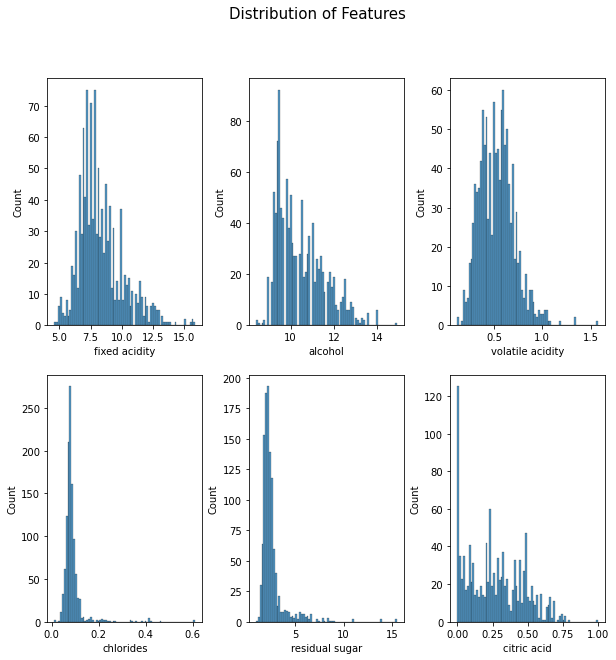

In [9]:
#plotting the distribution of some feature
fig, ((ax, ax1,ax2), (ax3,ax4,ax5)) =plt.subplots(2,3, figsize = (10,10))
fig.suptitle('Distribution of Features', fontsize = 15)
sb.histplot(data = df, x ='fixed acidity', bins = 75, ax = ax)
sb.histplot(data = df, x ='alcohol', bins = 75, ax = ax1)
sb.histplot(data = df, x ='volatile acidity', bins = 75, ax = ax2)
sb.histplot(data = df, x ='chlorides', bins = 75, ax = ax3)
sb.histplot(data = df, x ='residual sugar', bins = 75, ax = ax4)
sb.histplot(data = df, x ='citric acid', bins = 75, ax = ax5)
plt.subplots_adjust(wspace = 0.3)

This just shows the distribution of some features in the dataset most of which are skewed to the right.

<a id = 'fs'></a>
# Feature Selection

This data is higly imbalanced and wine quality has weak correlations with other features. Here, I will select significant features for my model.

In [10]:
#classify the quality of wine 0 for bad , 1 for good
df['quality']= df['quality'].apply(lambda x : 1 if x>6 else 0)

In [11]:
x = df.drop(columns = ['Id', 'quality'], axis = 1)
y = df['quality']

In [12]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64

#### Split the dataset

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

<a id = 'md'></a>
# Model Development


### 1. Decision Tree Model

In [15]:
dtree = DecisionTreeClassifier(max_depth = 5)

In [16]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

### 2. Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rforest = RandomForestClassifier(n_estimators = 200)

In [24]:
rforest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

### 3. Support Vector Machine

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [59]:
#split into validation sets
x_value, x_val, y_value, y_val = train_test_split(x_train, y_train, test_size = 0.2 , random_state = 42)

In [60]:
#define the parameter grid to search over
param_grid = {'C': [0.1,1,10,100,1000]}

In [61]:
#create an svm object
svc = SVC()

In [62]:
#create a grid search object with cross-validation
grid_search = GridSearchCV(svc, param_grid, cv = 5, scoring = 'accuracy')

In [63]:
#fit the grid search object to the training data
grid_search.fit(x_value, y_value)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [64]:
#print the best hyperparameters and performance
print('Best Hyperparameters: ', grid_search.best_params_)
print('Validation accuracy: ', grid_search.best_score_)

Best Hyperparameters:  {'C': 0.1}
Validation accuracy:  0.8645699375640667


In [66]:
#train the final SVM model on the combined training and validation sets with the best value of C
best_c = grid_search.best_params_['C']
final_svc = SVC(kernel ='linear', C = best_c)
final_svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

### 4. KNN

#### Standardize the Variables
- KNN predicts the class of a given test observation by identifying the observations closest to it. As a result, we need to scale the variables to avoid any variable having a larger effect on the distance between the observation than variables on the small scale, and hence on the KNN classifier.

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
scaler.fit(df.drop('quality', axis = 1))

StandardScaler()

In [37]:
scaled = scaler.transform(df.drop('quality', axis = 1))

In [38]:
df_scaled = pd.DataFrame(scaled, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','Id']
)

In [39]:
x_new = df_scaled.drop('Id', axis = 1)
y_new = df['quality']

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
# Create a KNN classifier with k=7
knn = KNeighborsClassifier(n_neighbors=7)

In [51]:
# Train the classifier on the training set
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

#### Plotting error rate vs k value to determine the best n_neighbor value

In [74]:
error_rate = []
for i in range(1,40):
    k_near = KNeighborsClassifier(n_neighbors=i)
    k_near.fit(x_train,y_train)
    pred_i = k_near.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.08733624454148471 at K = 2


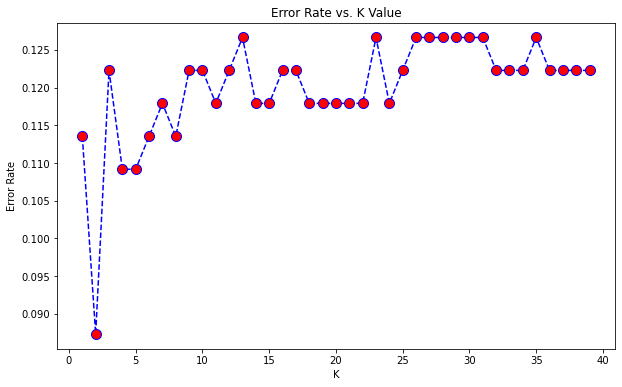

In [75]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)

In [79]:
#fitiing the knn classifier to the training set with the optimal k value
kclass = KNeighborsClassifier(n_neighbors = req_k_value)

In [81]:
kclass.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

### 5. Naive Bayes 

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
#create a Gaussian Naive Bayes Classifier
gnb = GaussianNB()

In [91]:
#train the classifier on the training data
gnb.fit(x_train, y_train)

GaussianNB()

<a id = 'me'></a>
# Model Evaluation

### 1.  Decision Tree Model

In [17]:
predictions = dtree.predict(x_test)
predictions[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [19]:
accuracy_score(y_test, predictions)

0.8908296943231441

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test, predictions)

array([[189,  12],
       [ 13,  15]], dtype=int64)

### 2.  Random Forest Model

In [25]:
predict = rforest.predict(x_test)

In [26]:
accuracy_score(y_test, predict)

0.925764192139738

In [27]:
confusion_matrix(y_test, predict)

array([[193,   8],
       [  9,  19]], dtype=int64)

### 3. Support Vector Machine

In [67]:
pred = final_svc.predict(x_test)

In [68]:
accuracy_score(y_test, pred)

0.8777292576419214

In [73]:
confusion_matrix(y_test, pred)

array([[201,   0],
       [ 28,   0]], dtype=int64)

### 4. KNN

In [52]:
# Predict the labels of the test set
y_pred = knn.predict(X_test)

In [53]:
accuracy_score(Y_test, y_pred)

0.8908296943231441

In [54]:
confusion_matrix(Y_test, y_pred)

array([[193,   8],
       [ 17,  11]], dtype=int64)

#### With optimal n_neighbor value

In [82]:
kpred = kclass.predict(X_test)

In [83]:
accuracy_score(Y_test, kpred)

0.8908296943231441

In [84]:
confusion_matrix(Y_test, kpred)

array([[197,   4],
       [ 21,   7]], dtype=int64)

### 5. Naive Bayes

In [92]:
nb_pred = gnb.predict(x_test)

In [93]:
accuracy_score(y_test, nb_pred)

0.8384279475982532

In [94]:
confusion_matrix(y_test, nb_pred)

array([[171,  30],
       [  7,  21]], dtype=int64)

<a id = 'cn'></a>
# Conclusion

In conclusion, the <b style = 'color : green'>Random forest model</b> proved to be the best model for this classification problem with approximately 93% accuracy. However, this model did not have the highest number of correct predictions for the positive class (true positive) when checked with the confusion matrix. The SVM model showed the highest number of true positives and also the highest number of false negatives.

<a id = 'lm'></a>
# Limitations

This dataset was not sufficient determine the metrics that define the quality of the wine as it did not have a enough entries as well as high correlation between the quality feature and other features.